# Datasets for EAD (Exploratory Data Analysis)
Importing needed libraries and setting configurations:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Contexto

#### The Data
The National Agency of Petroleum, Natural Gas and Bio fuels (ANP in Portuguese) releases weekly reports of gas, diesel and other fuels prices used in transportation across the country. These datasets bring the mean value per liter, number of gas stations analyzed and other information grouped by regions and states across the country.

<img src="anp-logo.jpg" width="200">

#### Source
As stated before, these datasets are provided by ANP, and are regularly updated with new dates and information - which can be retrieved here (in portuguese).

#### What can be done with this?
* How different regions of Brazil saw their gas prices change?
* Within a region, which states increased more their prices?
* Which states are the cheapest (or most expensive) for different types of fuels?

# 2. Questões de negócio

* O que afeta a margem de distribuição?
* O que afeta o coeficiente de variação na distribuição e revenda?

# 3. Montagem de Dataset

## [Gas Prices in Brazil 2004-2019 Dataset](https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil)

Download diretamente ANP

In [ ]:
def download_source():
    old = pd.read_excel('http://www.anp.gov.br/images/Precos/Semanal/estados.xlsx', skiprows = 12)

    current = pd.read_excel('http://www.anp.gov.br/images/Precos/Semanal2013/SEMANAL_ESTADOS-DESDE_2013.xlsx', skiprows = 16)

    return pd.concat([old, current])

df = download_source()

df.to_pickle('anp.pkl')

df = pd.read_pickle('anp.pkl')

Importação dos dados

In [21]:
df = pd.read_csv('data_gasPricesBR_2004-2019.tsv',
                 low_memory=False,
                 sep = '\t',
                 index_col = 0,
                 na_values='-',
                 parse_dates=['DATA INICIAL', 'DATA FINAL']
                )

print(f'Data shape: {df.shape} (rows, columns)')
df.info()
df.head()

Data shape: (106823, 20) (rows, columns)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   106823 non-null  datetime64[ns]
 1   DATA FINAL                     106823 non-null  datetime64[ns]
 2   REGIÃO                         106823 non-null  object        
 3   ESTADO                         106823 non-null  object        
 4   PRODUTO                        106823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64         
 6   UNIDADE DE MEDIDA              106823 non-null  object        
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA       

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


# 4. Caracterização de Dataset

#### Estatísticas

In [8]:
def get_stats(data):
    # Select numeric columns
    num = data.select_dtypes(['float64', 'int64', 'bool', 'datetime64[ns]'])
    
    # Count mode value
    max_count = lambda col: col.value_counts().max()

    aux = pd.DataFrame(
        {
            'type': data.dtypes,
            'missing values': data.isnull().sum() / data.shape[0],
            '% most commom value': data.apply(max_count)/ data.shape[0],
            'mean': num.mean(),
            'median': num.median(),
            'max': num.max(),
            'min': num.min(),
#             'mode': data.select_dtypes(['object']).mode(dropna = False)[:1].transpose(),
            '# Unique Values': data.nunique(),
            'STD': num.std(),
#             'Skew': num.skew(),
#             'Kurtosis': num.kurtosis()

        },
        index = data.columns)
    
    return aux

aux = get_stats(df)
aux

,type,missing values,% most commom value,mean,median,max,min,# Unique Values,STD
DATA INICIAL,datetime64[ns],0.000000,0.001442,NaN,NaN,2019-06-23 00:00:00,2004-05-09 00:00:00,785,NaN
DATA FINAL,datetime64[ns],0.000000,0.001442,NaN,NaN,2019-06-29 00:00:00,2004-05-15 00:00:00,785,NaN
REGIÃO,object,0.000000,0.345141,NaN,NaN,NaN,NaN,5,NaN
ESTADO,object,0.000000,0.039907,NaN,NaN,NaN,NaN,27,NaN
PRODUTO,object,0.000000,0.198403,NaN,NaN,NaN,NaN,6,NaN
NÚMERO DE POSTOS PESQUISADOS,int64,0.000000,0.010812,233.770976,104.0000,4167,1,2219,403.282519
UNIDADE DE MEDIDA,object,0.000000,0.679657,NaN,NaN,NaN,NaN,3,NaN
PREÇO MÉDIO REVENDA,float64,0.000000,0.001947,10.870780,2.7180,99.357,0.766,18612,17.752533
DESVIO PADRÃO REVENDA,float64,0.000000,0.020117,0.657227,0.1140,10.748,0,6341,1.349169
PREÇO MÍNIMO REVENDA,float64,0.000000,0.020127,9.416038,2.5100,90,0.59,2047,15.092193


In [ ]:
descricoes = {
    'DATA INICIAL': 'Data inicial das analises',
    'DATA FINAL': 'Data final das analises',
    'REGIÃO': 'Região Geográfica',
    'ESTADO': 'Estado',
    'PRODUTO': 'Tipo de produto analisado',
    'NÚMERO DE POSTOS PESQUISADOS': 'Número de postos analisados',
    'UNIDADE DE MEDIDA': 'Unidade de medida considerada',
    'PREÇO MÉDIO REVENDA': 'Preço médio de venda dos distribuidores de combustível',
    'DESVIO PADRÃO REVENDA': 'Desvio Padrão do preço na revenda',
    'PREÇO MÍNIMO REVENDA': 'Menor preço observado na revenda',
    'PREÇO MÁXIMO REVENDA': 'Maior preço observado na revenda',
    'MARGEM MÉDIA REVENDA': 'Diferença entre o preço pago pelo distribuidor e o preço no posto de gasolina',
    'COEF DE VARIAÇÃO REVENDA': 'Desvio padrão do preço de revenda dividio pelo preço médio de revenda',
    'PREÇO MÉDIO DISTRIBUIÇÃO': 'Preço médio praticado pelos distribuidores de combustível para os postos de gasolina',
    'DESVIO PADRÃO DISTRIBUIÇÃO': 'Desvio padrão do preco de distribuição',
    'PREÇO MÍNIMO DISTRIBUIÇÃO': 'Preço mínimo de distribuição',
    'PREÇO MÁXIMO DISTRIBUIÇÃO': 'Preço máximo de distribuição',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO': 'Desvio padrão do preço de distribuição dividio pelo preço médio de distribuição',
    'MÊS': 'Mês de referência',
    'ANO': 'Ano de referência'
}

for i in aux.index:
    print(f'### **{i.capitalize()}**')
    print(f'* **Tipo**: {aux["type"][i]}')
    print(f'* **Valores Nulos**: {aux["missing values"][i]*100:.1f}%')
    print(f'* **Descrição**: {descricoes[i]}' )
    if aux["type"][i] == 'object':
        print('* **Valores únicos**:', ', '.join(df[i].unique()))
    if aux["type"][i] == 'float64' or aux["type"][i] == 'int64':
        print(f'* **Média**: {df[i].mean():.2f}')
        print(f'* **Mediana**: {df[i].median():.2f}')
        print(f'* **Desvio Padrão**: {df[i].std():.2f}')

        
    print()
        
    

## Descrição dos dados
### **Data inicial**
* **Tipo**: datetime64[ns]
* **Valores Nulos**: 0.0%
* **Descrição**: Data inicial das analises

### **Data final**
* **Tipo**: datetime64[ns]
* **Valores Nulos**: 0.0%
* **Descrição**: Data final das analises

### **Região**
* **Tipo**: object
* **Valores Nulos**: 0.0%
* **Descrição**: Região Geográfica
* **Valores únicos**: CENTRO OESTE, NORDESTE, NORTE, SUDESTE, SUL

### **Estado**
* **Tipo**: object
* **Valores Nulos**: 0.0%
* **Descrição**: Estado
* **Valores únicos**: DISTRITO FEDERAL, GOIAS, MATO GROSSO, MATO GROSSO DO SUL, ALAGOAS, BAHIA, CEARA, MARANHAO, PARAIBA, PERNAMBUCO, PIAUI, RIO GRANDE DO NORTE, SERGIPE, ACRE, AMAPA, AMAZONAS, PARA, RONDONIA, RORAIMA, TOCANTINS, ESPIRITO SANTO, MINAS GERAIS, RIO DE JANEIRO, SAO PAULO, PARANA, RIO GRANDE DO SUL, SANTA CATARINA

### **Produto**
* **Tipo**: object
* **Valores Nulos**: 0.0%
* **Descrição**: Tipo de produto analisado
* **Valores únicos**: ETANOL HIDRATADO, GASOLINA COMUM, GLP, GNV, ÓLEO DIESEL, ÓLEO DIESEL S10

### **Número de postos pesquisados**
* **Tipo**: int64
* **Valores Nulos**: 0.0%
* **Descrição**: Número de postos analisados
* **Média**: 233.77
* **Mediana**: 104.00
* **Desvio Padrão**: 403.28

### **Unidade de medida**
* **Tipo**: object
* **Valores Nulos**: 0.0%
* **Descrição**: Unidade de medida considerada
* **Valores únicos**: R$/l, R$/13Kg, R$/m3

### **Preço médio revenda**
* **Tipo**: float64
* **Valores Nulos**: 0.0%
* **Descrição**: Preço médio de venda dos distribuidores de combustível
* **Média**: 10.87
* **Mediana**: 2.72
* **Desvio Padrão**: 17.75

### **Desvio padrão revenda**
* **Tipo**: float64
* **Valores Nulos**: 0.0%
* **Descrição**: Desvio Padrão do preço na revenda
* **Média**: 0.66
* **Mediana**: 0.11
* **Desvio Padrão**: 1.35

### **Preço mínimo revenda**
* **Tipo**: float64
* **Valores Nulos**: 0.0%
* **Descrição**: Menor preço observado na revenda
* **Média**: 9.42
* **Mediana**: 2.51
* **Desvio Padrão**: 15.09

### **Preço máximo revenda**
* **Tipo**: float64
* **Valores Nulos**: 0.0%
* **Descrição**: Maior preço observado na revenda
* **Média**: 12.54
* **Mediana**: 3.00
* **Desvio Padrão**: 20.84

### **Margem média revenda**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Diferença entre o preço pago pelo distribuidor e o preço no posto de gasolina
* **Média**: 2.23
* **Mediana**: 0.38
* **Desvio Padrão**: 4.38

### **Coef de variação revenda**
* **Tipo**: float64
* **Valores Nulos**: 0.0%
* **Descrição**: Desvio padrão do preço de revenda dividio pelo preço médio de revenda
* **Média**: 0.05
* **Mediana**: 0.04
* **Desvio Padrão**: 0.03

### **Preço médio distribuição**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Preço médio praticado pelos distribuidores de combustível para os postos de gasolina
* **Média**: 8.56
* **Mediana**: 2.33
* **Desvio Padrão**: 13.60

### **Desvio padrão distribuição**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Desvio padrão do preco de distribuição
* **Média**: 0.56
* **Mediana**: 0.08
* **Desvio Padrão**: 1.26

### **Preço mínimo distribuição**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Preço mínimo de distribuição
* **Média**: 7.41
* **Mediana**: 2.22
* **Desvio Padrão**: 11.68

### **Preço máximo distribuição**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Preço máximo de distribuição
* **Média**: 9.80
* **Mediana**: 2.51
* **Desvio Padrão**: 15.93

### **Coef de variação distribuição**
* **Tipo**: float64
* **Valores Nulos**: 3.2%
* **Descrição**: Desvio padrão do preço de distribuição dividio pelo preço médio de distribuição
* **Média**: 0.05
* **Mediana**: 0.03
* **Desvio Padrão**: 0.04

### **Mês**
* **Tipo**: int64
* **Valores Nulos**: 0.0%
* **Descrição**: Mês de referência
* **Média**: 6.48
* **Mediana**: 6.00
* **Desvio Padrão**: 3.44

### **Ano**
* **Tipo**: int64
* **Valores Nulos**: 0.0%
* **Descrição**: Ano de referência
* **Média**: 2011.80
* **Mediana**: 2012.00
* **Desvio Padrão**: 4.39

# 5. Visualização e Discussão

### O que afeta a margem de distribuição?

É possível notar que o patamar de preços possui grande

In [105]:
plt.style.use('seaborn')

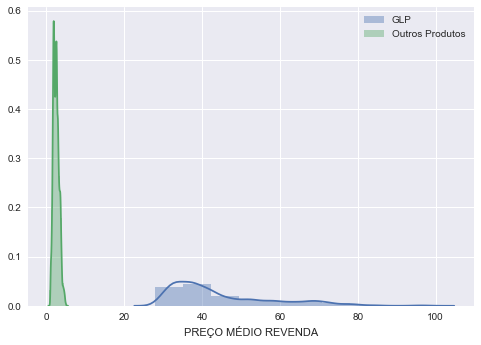

In [106]:
sns.distplot(df.query('PRODUTO == "GLP"')['PREÇO MÉDIO REVENDA'], label = "GLP", bins = 10)
sns.distplot(df.query('PRODUTO != "GLP"')['PREÇO MÉDIO REVENDA'], label = "Outros Produtos", bins = 10)

plt.legend()
plt.show()

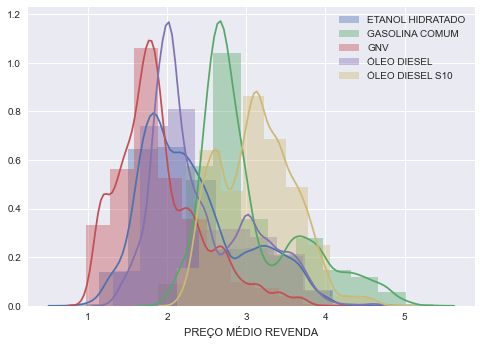

In [107]:
produtos = ['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10']

for i in df['PRODUTO'].unique():
    if i != 'GLP':
        sns.distplot(df.query(f'PRODUTO == "{i}"')['PREÇO MÉDIO REVENDA'], label = i, bins = 10)

plt.legend()
plt.show()

In [108]:
df['Margem (%)'] = df['MARGEM MÉDIA REVENDA']/df['PREÇO MÉDIO REVENDA']

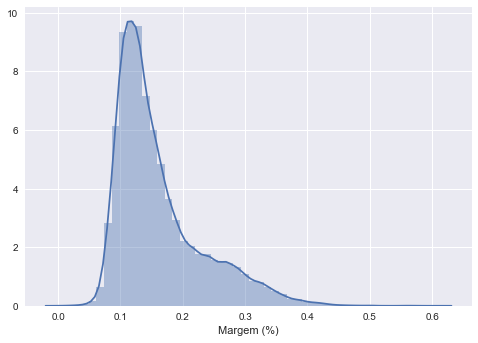

In [109]:
sns.distplot(df['Margem (%)'])
plt.show()

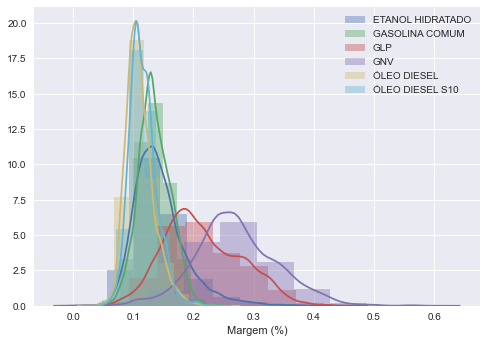

In [110]:
for i in df['PRODUTO'].unique():
    sns.distplot(df.query(f'PRODUTO == "{i}"')['Margem (%)'], label = i, bins = 10)

plt.legend()
plt.show()

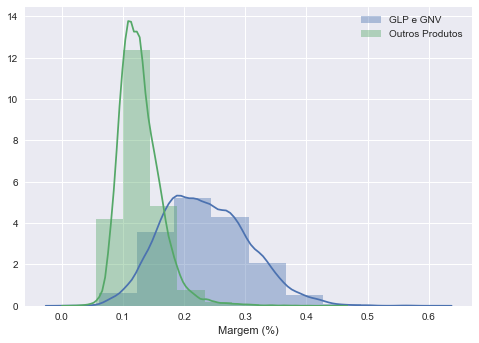

In [111]:
sns.distplot(df.query('PRODUTO == "GLP" or PRODUTO == "GNV"')['Margem (%)'], label = "GLP e GNV", bins = 10)
sns.distplot(df.query('PRODUTO != "GLP" and PRODUTO != "GNV"')['Margem (%)'], label = "Outros Produtos", bins = 10)

plt.legend()
plt.show()

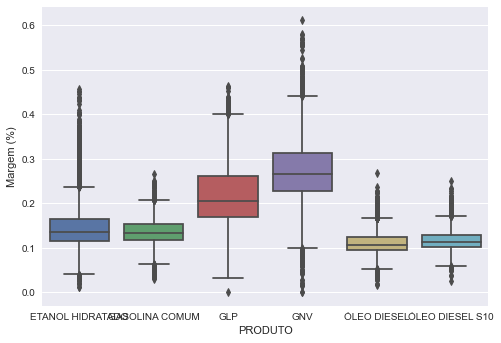

In [112]:
sns.boxplot(data = df, x = 'PRODUTO', y = 'Margem (%)')
plt.show()

No handles with labels found to put in legend.


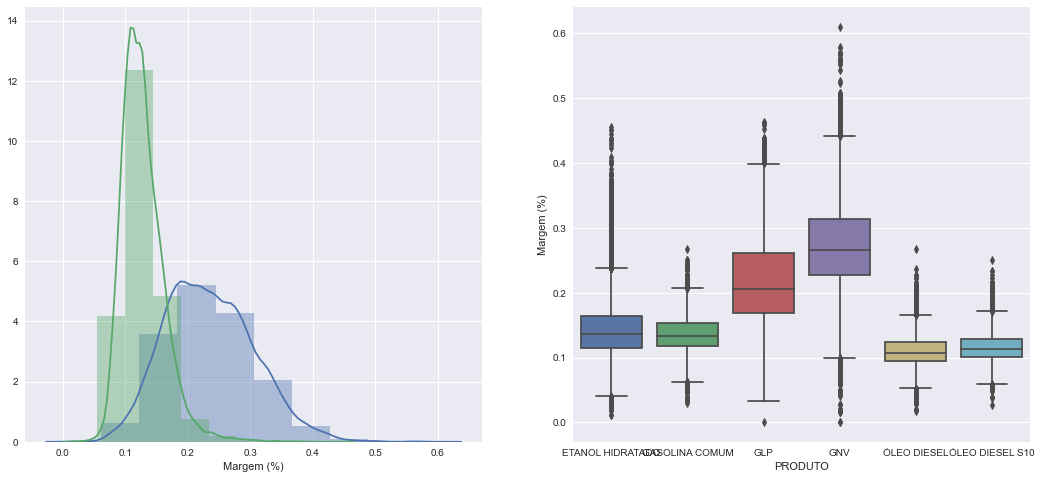

In [136]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (18,8))

sns.distplot(df.query('PRODUTO == "GLP" or PRODUTO == "GNV"')['Margem (%)'], label = "GLP e GNV", bins = 10, ax = axs[0])
sns.distplot(df.query('PRODUTO != "GLP" and PRODUTO != "GNV"')['Margem (%)'], label = "Outros Produtos", bins = 10, ax = axs[0])

ax[0].legend()

sns.boxplot(data = df, x = 'PRODUTO', y = 'Margem (%)', ax = axs[1])

plt.show()

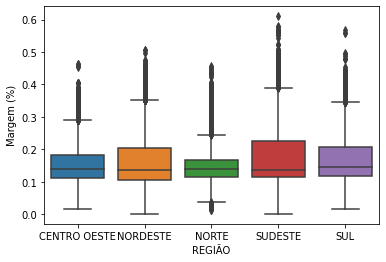

In [87]:
sns.boxplot(data = df, x = 'REGIÃO', y = 'Margem (%)')

### O que afeta o coeficiente de variação na distribuição e revenda?

# 6. Conclusões

### Apêndice

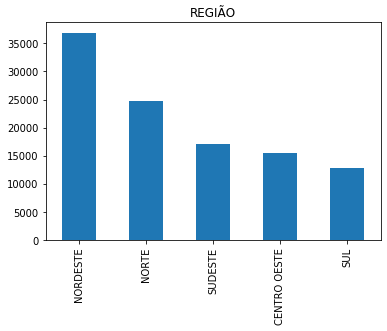

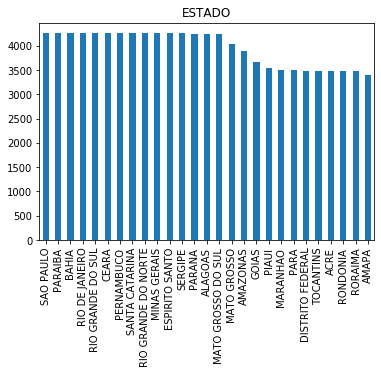

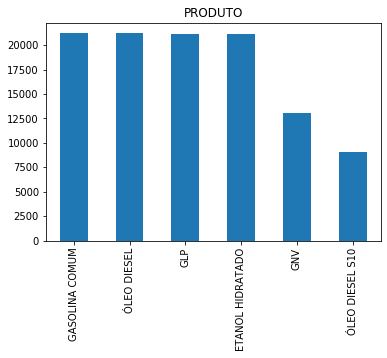

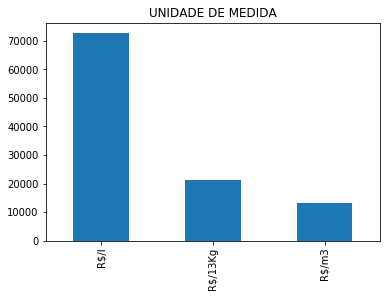

In [9]:
cols = df.columns[(df.nunique() <= 11) | (df.dtypes == 'object')]

for i in cols:
    df[i].value_counts().plot.bar(title = i)
    plt.show()

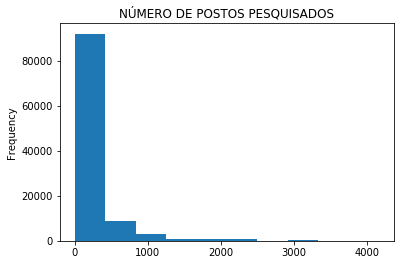

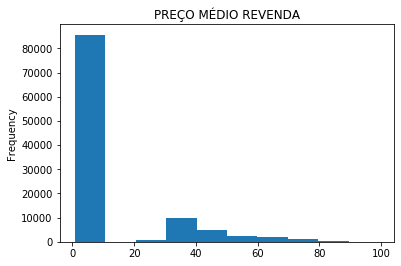

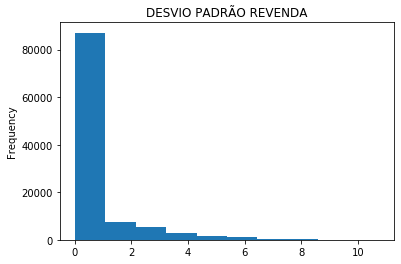

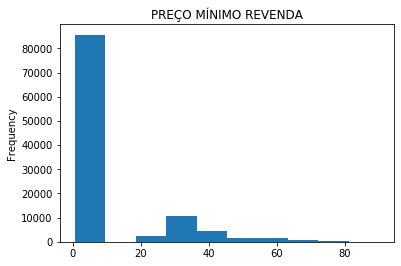

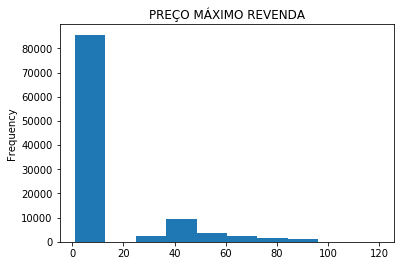

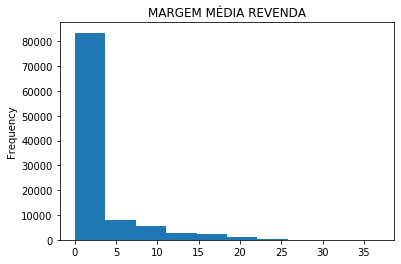

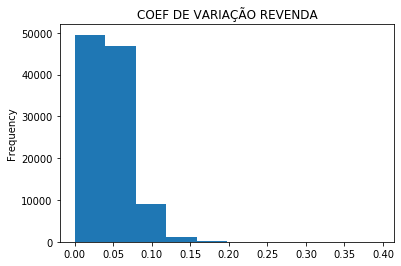

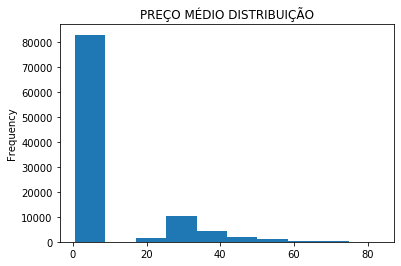

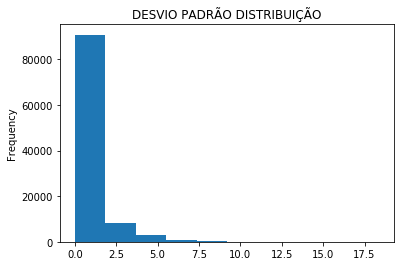

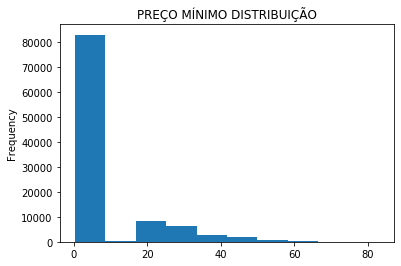

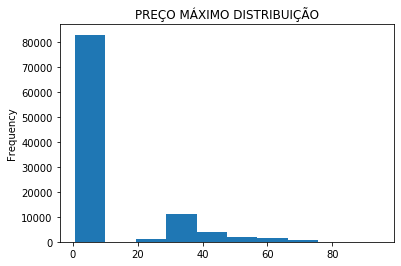

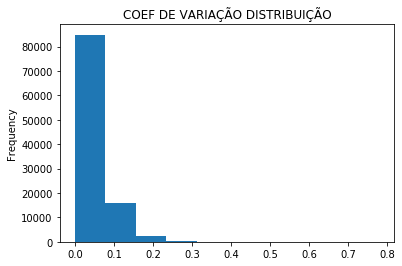

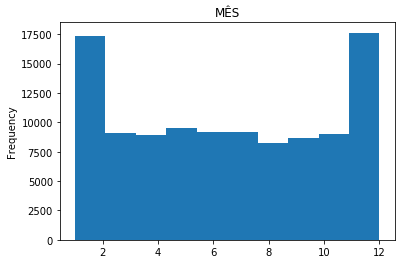

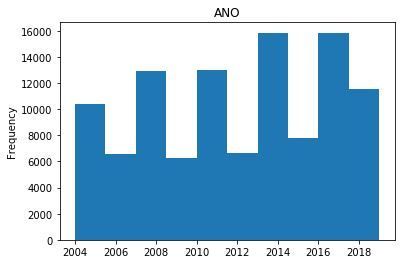

In [10]:
data_sel = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
cols = data_sel.columns

for i in cols:
    
    df[i].plot.hist(title = i)
    
    plt.show()

In [11]:
data_sel = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
cols = data_sel.columns[data_sel.nunique() > 16]

sns.pairplot(df[cols], kind = 'reg')

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a19d96560> (for post_execute):


KeyboardInterrupt: 

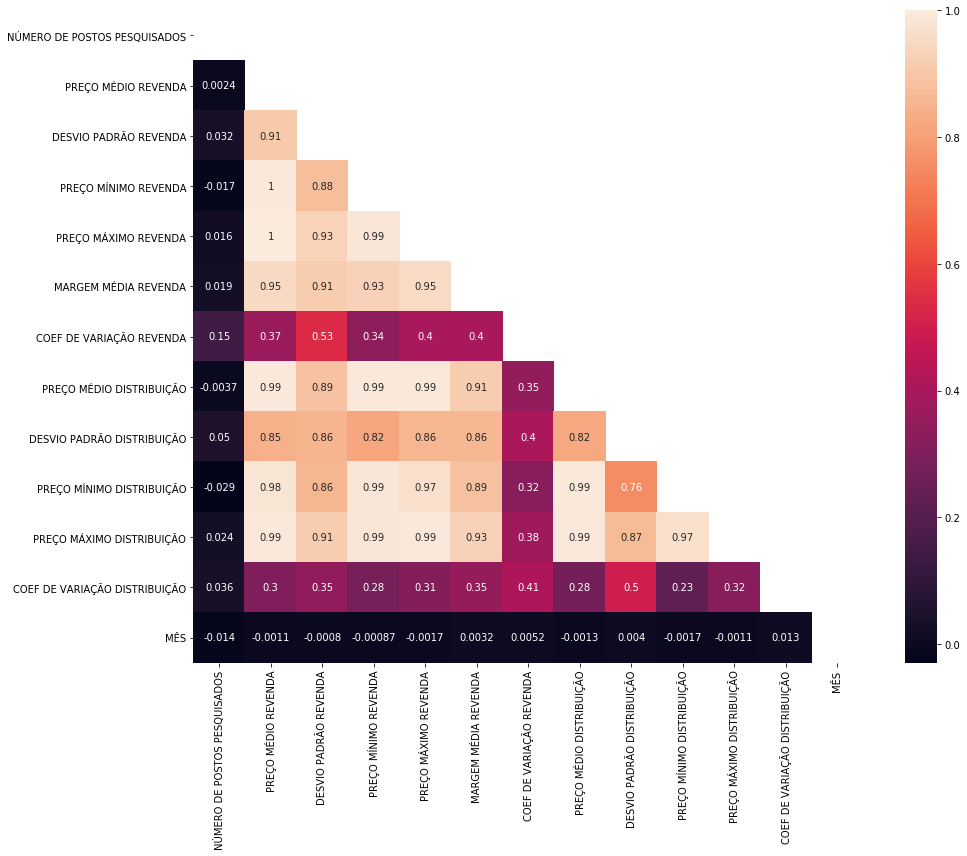

In [12]:
plt.subplots(figsize=(15,12))

corr = df.select_dtypes(['float64', 'int64', 'bool']).iloc[:,:-1].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask = mask,annot = True, )

plt.show()

In [33]:
import ppscore

In [62]:
score = ppscore.matrix(df)

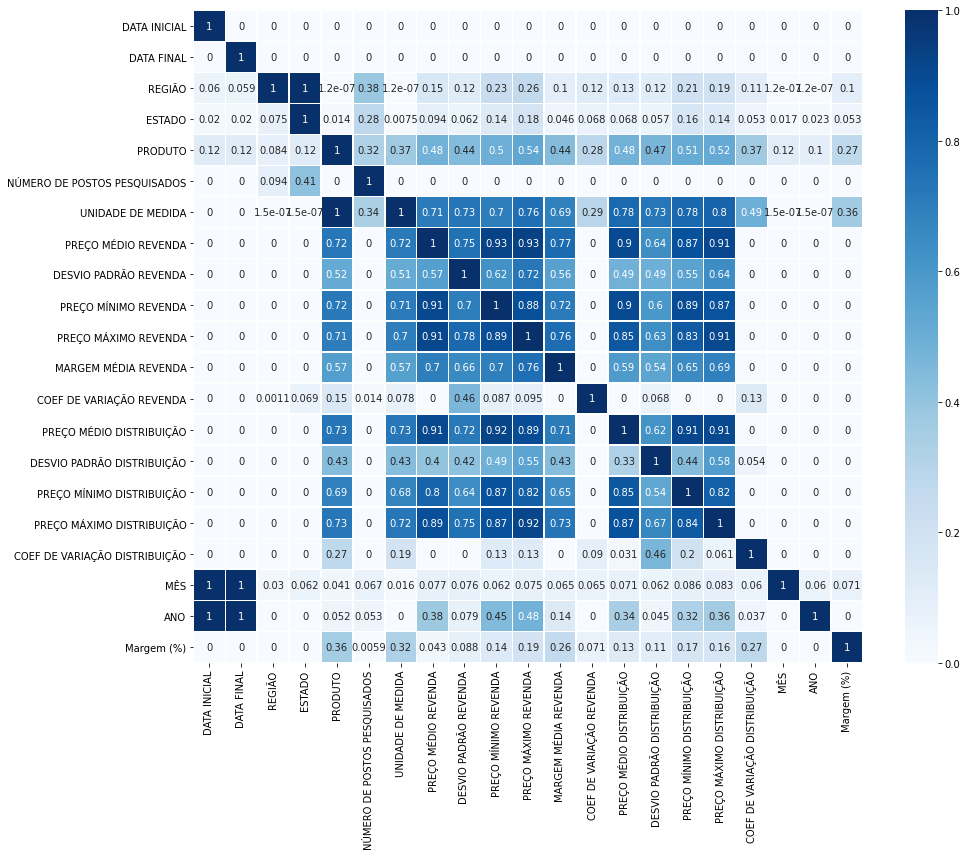

In [63]:
plt.subplots(figsize=(15,12))
sns.heatmap(score, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()